# Data Wrangling 

  
   ## Introduction 

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

The goal of this project is to wrangle data from WeRateDogs Twitter's account using Python and document the whole process in a Jupyter Notebook named wrangle_act.ipynb i.e. this notebook. My aim is to wrangle this data for interesting and trustworthy analyses using visualizations.

   ## Project Details
    
    
Fully assessing and cleaning the entire dataset would require exceptional effort so only a subset of its issues (eight quality issues and two tidiness issues at minimum)needed to be assessed and cleaned.The tasks for this project were:
    
    1. Data wrangling which consist of:
        a. Data Gathering 
        b. Data Acessing 
        c. Data Cleaning.
    2. Data Visualization 
    
    

## Data Gathering 

  Here, Data is gathered from three diffrent source assigned in the project:
  
  ### Enhanced Twitter Archive
  
The **WeRateDogs** Twitter archive provided by Udacity. This contains basic tweet data for all 5000+ of their tweets, but not everything.I manually downloaded this file manually **twitter_archive_enhanced.csv**.


  ### Image Predictions File

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: 
[image_predictions.tsv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)
   
   
 ### Additional Data via the Twitter API( Tweepy)
 
Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called **tweet_json.txt** file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.



   
   

In [335]:
##installing twitter api for gathering twitter data.
!pip install tweepy

In [336]:
#importing libraries for data wrangling process.
import matplotlib
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

%matplotlib inline

In [337]:
#loading twitter-archive-enhanced.csv to pandas dataframe. 
twitter_enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_enhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [338]:
#Acessing image predictions by neural network and gathering them to file name image_predictions.tsv .
## to make it highly scalable.
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
df_image_predictions.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'mmmmmmmmmmmmm'
consumer_secret = 'mmmmmmmmmmmm'
access_token = 'mmmmmmmmmmmmmmm'
access_secret = 'mmmmmmmmmmmmm'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


# twitter_enhanced_df is a DataFrame with the twitter_archive_enhanced.csv file.
# Tweet IDs for which to gather additional data via Twitter's API.
tweet_ids = twitter_enhanced_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive.
count = 0
fails_dict = {}
df_tweets = []
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')._json
            favorites = tweet['favorite_count'] # number of favorites for the tweet
            retweets = tweet['retweet_count'] # number of retweets
            user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
            user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
            date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
            df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print("Time taken by machine to fetch the data:")
print(end - start)
print('\n')
print("tweet deatails which we are unable to fetch:")
print(fails_dict)

1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
Fail
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 884562892145688576
42: 884441805382717440
43: 884247878851493888
44: 88416267058

344: 832040443403784192
345: 832032802820481025
346: 831939777352105988
347: 831926988323639298
348: 831911600680497154
349: 831670449226514432
350: 831650051525054464
351: 831552930092285952
352: 831322785565769729
353: 831315979191906304
354: 831309418084069378
355: 831262627380748289
356: 830956169170665475
357: 830583320585068544
358: 830173239259324417
359: 830097400375152640
360: 829878982036299777
361: 829861396166877184
362: 829501995190984704
363: 829449946868879360
364: 829374341691346946
Fail
365: 829141528400556032
366: 829011960981237760
367: 828801551087042563
368: 828770345708580865
369: 828708714936930305
370: 828650029636317184
371: 828409743546925057
372: 828408677031882754
373: 828381636999917570
374: 828376505180889089
375: 828372645993398273
376: 828361771580813312
377: 828046555563323392
378: 828011680017821696
379: 827933404142436356
380: 827653905312006145
381: 827600520311402496
382: 827324948884643840
383: 827228250799742977
Fail
384: 827199976799354881
385: 8

685: 788178268662984705
686: 788150585577050112
687: 788070120937619456
688: 788039637453406209
689: 787810552592695296
690: 787717603741622272
691: 787397959788929025
692: 787322443945877504
693: 787111942498508800
694: 786963064373534720
695: 786729988674449408
696: 786709082849828864
697: 786664955043049472
698: 786595970293370880
699: 786363235746385920
700: 786286427768250368
701: 786233965241827333
702: 786051337297522688
703: 786036967502913536
704: 785927819176054784
705: 785872687017132033
706: 785639753186217984
707: 785533386513321988
708: 785515384317313025
709: 785264754247995392
710: 785170936622350336
711: 784826020293709826
712: 784517518371221505
713: 784431430411685888
714: 784183165795655680
715: 784057939640352768
716: 783839966405230592
717: 783821107061198850
718: 783695101801398276
719: 783466772167098368
720: 783391753726550016
721: 783347506784731136
722: 783334639985389568
723: 783085703974514689
724: 782969140009107456
725: 782747134529531904
726: 78272259879

1025: 746507379341139972
1026: 746369468511756288
1027: 746131877086527488
1028: 746056683365994496
1029: 745789745784041472
1030: 745712589599014916
1031: 745433870967832576
1032: 745422732645535745
1033: 745314880350101504
1034: 745074613265149952
1035: 745057283344719872
1036: 744995568523612160
1037: 744971049620602880
1038: 744709971296780288
1039: 744334592493166593
1040: 744234799360020481
1041: 744223424764059648
1042: 743980027717509120
1043: 743895849529389061
1044: 743835915802583040
1045: 743609206067040256
1046: 743595368194129920
1047: 743545585370791937
1048: 743510151680958465
1049: 743253157753532416
1050: 743222593470234624
1051: 743210557239623680
1052: 742534281772302336
1053: 742528092657332225
1054: 742465774154047488
1055: 742423170473463808
1056: 742385895052087300
1057: 742161199639494656
1058: 742150209887731712
1059: 741793263812808706
1060: 741743634094141440
1061: 741438259667034112
1062: 741303864243200000
1063: 741099773336379392
1064: 741067306818797568


1353: 703774238772166656
1354: 703769065844768768
1355: 703631701117943808
1356: 703611486317502464
1357: 703425003149250560
1358: 703407252292673536
1359: 703382836347330562
1360: 703356393781329922
1361: 703268521220972544
1362: 703079050210877440
1363: 703041949650034688
1364: 702932127499816960
1365: 702899151802126337
1366: 702684942141153280
1367: 702671118226825216
1368: 702598099714314240
1369: 702539513671897089
1370: 702332542343577600
1371: 702321140488925184
1372: 702276748847800320
1373: 702217446468493312
1374: 701981390485725185
1375: 701952816642965504
1376: 701889187134500865
1377: 701805642395348998
1378: 701601587219795968
1379: 701570477911896070
1380: 701545186879471618
1381: 701214700881756160
1382: 700890391244103680
1383: 700864154249383937
1384: 700847567345688576
1385: 700796979434098688
1386: 700747788515020802
1387: 700518061187723268
1388: 700505138482569216
1389: 700462010979500032
1390: 700167517596164096
1391: 700151421916807169
1392: 700143752053182464


1681: 682003177596559360
1682: 681981167097122816
1683: 681891461017812993
1684: 681694085539872773
1685: 681679526984871937
1686: 681654059175129088
1687: 681610798867845120
1688: 681579835668455424
1689: 681523177663676416
1690: 681340665377193984
1691: 681339448655802368
1692: 681320187870711809
1693: 681302363064414209
1694: 681297372102656000
1695: 681281657291280384
1696: 681261549936340994
1697: 681242418453299201
1698: 681231109724700672
1699: 681193455364796417
1700: 680970795137544192
1701: 680959110691590145
1702: 680940246314430465
1703: 680934982542561280
1704: 680913438424612864
1705: 680889648562991104
1706: 680836378243002368
1707: 680805554198020098
1708: 680801747103793152
1709: 680798457301471234
1710: 680609293079592961
1711: 680583894916304897
1712: 680497766108381184
1713: 680494726643068929
1714: 680473011644985345
1715: 680440374763077632
1716: 680221482581123072
1717: 680206703334408192
1718: 680191257256136705
1719: 680176173301628928
1720: 680161097740095489


2009: 672256522047614977
2010: 672254177670729728
2011: 672248013293752320
2012: 672245253877968896
2013: 672239279297454080
2014: 672231046314901505
2015: 672222792075620352
2016: 672205392827572224
2017: 672169685991993344
2018: 672160042234327040
2019: 672139350159835138
2020: 672125275208069120
2021: 672095186491711488
2022: 672082170312290304
2023: 672068090318987265
2024: 671896809300709376
2025: 671891728106971137
2026: 671882082306625538
2027: 671879137494245376
2028: 671874878652489728
2029: 671866342182637568
2030: 671855973984772097
2031: 671789708968640512
2032: 671768281401958400
2033: 671763349865160704
2034: 671744970634719232
2035: 671743150407421952
2036: 671735591348891648
2037: 671729906628341761
2038: 671561002136281088
2039: 671550332464455680
2040: 671547767500775424
2041: 671544874165002241
2042: 671542985629241344
2043: 671538301157904385
2044: 671536543010570240
2045: 671533943490011136
2046: 671528761649688577
2047: 671520732782923777
2048: 671518598289059840


2337: 666273097616637952
2338: 666268910803644416
2339: 666104133288665088
2340: 666102155909144576
2341: 666099513787052032
2342: 666094000022159362
2343: 666082916733198337
2344: 666073100786774016
2345: 666071193221509120
2346: 666063827256086533
2347: 666058600524156928
2348: 666057090499244032
2349: 666055525042405380
2350: 666051853826850816
2351: 666050758794694657
2352: 666049248165822465
2353: 666044226329800704
2354: 666033412701032449
2355: 666029285002620928
2356: 666020888022790149
2207.100955294998
{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 8668162802838077

In [ ]:
# creating DataFrame of data gathered by 
df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
## saving the dataFrame to tweet_json.txt file.
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [339]:
df_tweets_json = pd.read_csv('tweet_json.txt')

In [340]:
df_tweets_json.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,35683,7547,8848515,145848,2017-08-01 16:23:56+00:00
1,892177421306343426,30861,5595,8848515,145848,2017-08-01 00:17:27+00:00
2,891815181378084864,23204,3707,8848515,145848,2017-07-31 00:18:03+00:00
3,891689557279858688,38967,7720,8848515,145848,2017-07-30 15:58:51+00:00
4,891327558926688256,37216,8329,8848515,145848,2017-07-29 16:00:24+00:00


In [341]:
df_tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2331 non-null   int64 
 1   favorites        2331 non-null   int64 
 2   retweets         2331 non-null   int64 
 3   user_followers   2331 non-null   int64 
 4   user_favourites  2331 non-null   int64 
 5   date_time        2331 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.4+ KB


# Data Acessing 
    


In [342]:
twitter_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [343]:
#getting the names of the columns.
print(twitter_enhanced_df.columns)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')


In [344]:
#finding the number of entries .
twitter_enhanced_df.shape

(2356, 17)

In [345]:
twitter_enhanced_df.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
468,817056546584727552,NaN,NaN,2017-01-05 17:13:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chloe. She fell asleep at the wheel. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817056546...,11,10,Chloe,None,None,None,None
1848,675798442703122432,NaN,NaN,2015-12-12 22:04:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bernie. He just touched a boob for the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675798442...,10,10,Bernie,None,None,None,None
1055,742385895052087300,NaN,NaN,2016-06-13 15:59:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. That's his comfort stick. He hol...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742385895...,11,10,Phil,None,None,None,None
61,880221127280381952,NaN,NaN,2017-06-29 00:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jesse. He's a Fetty Woof. His tongue ejec...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880221127...,12,10,Jesse,None,None,None,None
1801,676957860086095872,NaN,NaN,2015-12-16 02:51:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",10/10 I'd follow this dog into battle no quest...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676957860...,10,10,None,None,None,None,None
1797,677269281705472000,NaN,NaN,2015-12-16 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest pupper I've ever seen. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677269281...,10,10,the,None,None,pupper,None
15,889278841981685760,NaN,NaN,2017-07-24 00:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. You're witnessing one of his m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889278841...,13,10,Oliver,None,None,None,None
1803,676948236477857792,NaN,NaN,2015-12-16 02:13:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Karl. Karl thinks he's slick. 6/10 sne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676948236...,6,10,Karl,None,None,None,None
826,769335591808995329,NaN,NaN,2016-08-27 00:47:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ever seen a dog pet another dog...,7.069045e+17,4.196984e+09,2016-03-07 18:09:06 +0000,"https://vine.co/v/iXQAm5Lrgrh,https://vine.co/...",13,10,None,None,None,None,None


In [346]:
#Investigate if twitter twitter_enhanced_df contains duplicate tweet_ids.
twitter_enhanced_df.tweet_id.duplicated().sum()

0

In [347]:
# finding the number entries with non meaning ful dog name.
len(twitter_enhanced_df[(twitter_enhanced_df['name'].apply(len) <= 2) 
                    | (twitter_enhanced_df.name.str.islower())])

124

In [348]:
#finding the non meaningful name.
twitter_enhanced_df[(twitter_enhanced_df['name'].apply(len) <= 2) 
                    | (twitter_enhanced_df.name.str.islower())].name.value_counts()

a               55
Bo               9
the              8
an               7
very             5
quite            4
one              4
just             4
not              2
mad              2
getting          2
actually         2
space            1
unacceptable     1
this             1
infuriating      1
old              1
such             1
O                1
Mo               1
JD               1
Al               1
my               1
Ed               1
Jo               1
life             1
officially       1
by               1
his              1
all              1
incredibly       1
light            1
Name: name, dtype: int64

In [349]:
# check if rating denominators above 10 are there as it is invalid rating.
print(twitter_enhanced_df[twitter_enhanced_df.rating_denominator != 10].loc[:,['text','rating_numerator','rating_denominator']].values[:10])

[["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
  960 0]
 ['@docmisterio account started on 11/15/15' 11 15]
 ['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd'
  84 70]
 ['Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'
  24 7]
 ['RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…'
  9 11]
 ['Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE'
  165 150]
 ['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'
  9 11]
 ['Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'
  204 170]
 ['H

**Conclusion on this rating matter**

* After visually acess this. i figured out thar there is a parser who parse the rating and and whenever it gets d/d it parses it as rating numerator and denomirator from the Text.
* But it's very challenging  if we look at the 2nd element of the list good brain storming require.
* I can do one thing lets visually acess the text for 

In [350]:
# check if rating denominators above 10 are there as it is invalid rating.
print(twitter_enhanced_df.loc[:,['text','rating_numerator','rating_denominator']].values[:-5])

[["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"
  13 10]
 ["This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
  13 10]
 ['This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'
  12 10]
 ...
 ['Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt'
  10 10]
 ["This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc"
  2 10]
 ['This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe'
  10 10]]


In [351]:
 #check if rating denominators above 10 are there as it is invalid rating.
print(twitter_enhanced_df.loc[:,['text','rating_numerator','rating_denominator']].values[40:60])

[["This is Kevin. He's just so happy. 13/10 what is your secret Kevin https://t.co/1r4MFCbCX5"
  13 10]
 ['I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC'
  14 10]
 ["OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj"
  13 10]
 ["Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ"
  12 10]
 ["This is Noah. He can't believe someone made this mess. Got the vacuum out for you though. Offered to help clean pup. 12/10 super good boy https://t.co/V85xujjDDY"
  12 10]
 ['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'
  5 10]
 ['Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes s

* it's an intresting insight from the random visual test of 'text' that here ratings can be decimal also. it's a facts also that rating can be in decimal. 

In [352]:
#Now from this it is clear that there are decimal values so let's  find these type of ratings.
with pd.option_context('max_colwidth', 200):
    display(twitter_enhanced_clean[twitter_enhanced_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['text', 'rating_numerator', 'rating_denominator']])

/home/aman-jain/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator,rating_denominator
40,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
548,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
603,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1438,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


* As there are very few so i can take care of a row index manully 

In [353]:
#it is the important and most prcious finding during acess.
list_dec_num_rating_index = [1438,548,40,4721]
values_to_map_num = [11.26,9.75,13.5,11.27]

In [354]:
# we have to change rating of denomirator to 10 also. So acessing the index.
# check if rating denominators above 10 are there as it is invalid rating.
print(twitter_enhanced_df[twitter_enhanced_df.rating_denominator != 10].loc[:,['text','rating_numerator','rating_denominator']])

                                                   text  rating_numerator  \
313   @jonnysun @Lin_Manuel ok jomny I know you're e...               960   
342            @docmisterio account started on 11/15/15                11   
433   The floofs have been released I repeat the flo...                84   
516   Meet Sam. She smiles 24/7 &amp; secretly aspir...                24   
784   RT @dog_rates: After so many requests, this is...                 9   
902   Why does this never happen at my front door......               165   
1068  After so many requests, this is Bretagne. She ...                 9   
1120  Say hello to this unbelievably well behaved sq...               204   
1165  Happy 4/20 from the squad! 13/10 for all https...                 4   
1202  This is Bluebert. He just saw that both #Final...                50   
1228  Happy Saturday here's 9 puppers on a bench. 99...                99   
1254  Here's a brigade of puppers. All look very pre...                80   

In [355]:
list_to_change_den_10_index = [313,342,433,
                               516,784,902,
                               1068,1120,1165,
                               1202,1228,1254,
                               1274,1351,1433,
                               1598,1634,1635,
                               1662,1663,1779,1843,2335]

In [356]:
# investigate in_reply_to_status_id data as it is missing a lot of records
twitter_enhanced_df.in_reply_to_status_id.value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
               ..
8.482121e+17    1
6.715449e+17    1
6.936422e+17    1
6.849598e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [357]:
#finding the diffrent sources of entries. 
twitter_enhanced_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [358]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [359]:
df_image_predictions.shape

(2075, 12)

In [360]:
df_image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [361]:
df_image_predictions.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1062,715220193576927233,https://pbs.twimg.com/media/Cez49UqWsAIRQXc.jpg,1,Chihuahua,0.584026,True,Italian_greyhound,0.377077,True,Boston_bull,0.017400,True
2034,883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True
1885,847842811428974592,https://pbs.twimg.com/media/C8QkidrVYAQXQh7.jpg,1,Bernese_mountain_dog,0.951337,True,Greater_Swiss_Mountain_dog,0.016849,True,Appenzeller,0.010849,True
564,678255464182861824,https://pbs.twimg.com/media/CWmlvxJU4AEAqaN.jpg,1,Chihuahua,0.613819,True,Yorkshire_terrier,0.127931,True,Pomeranian,0.062124,True
1582,796759840936919040,https://pbs.twimg.com/media/Cw6o1JQXcAAtP78.jpg,1,American_Staffordshire_terrier,0.463996,True,Staffordshire_bullterrier,0.155566,True,Weimaraner,0.137587,True
1870,844704788403113984,https://pbs.twimg.com/media/C7j-hkSW0AIxCZC.jpg,1,Labrador_retriever,0.980213,True,golden_retriever,0.007012,True,beagle,0.003147,True
983,707411934438625280,https://pbs.twimg.com/media/CdE7ZktXIAEiWLj.jpg,1,Lakeland_terrier,0.738277,True,Airedale,0.028515,True,giant_schnauzer,0.024876,True
30,666418789513326592,https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg,1,toy_terrier,0.149680,True,papillon,0.148258,True,Chihuahua,0.142860,True
1092,719551379208073216,https://pbs.twimg.com/media/CfxcKU6W8AE-wEx.jpg,1,malamute,0.873233,True,Siberian_husky,0.076435,True,Eskimo_dog,0.035745,True
349,672482722825261057,https://pbs.twimg.com/media/CVUjd14W4AE8tvO.jpg,1,West_Highland_white_terrier,0.586173,True,borzoi,0.206620,True,Great_Pyrenees,0.060653,True


In [362]:
df_tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2331 non-null   int64 
 1   favorites        2331 non-null   int64 
 2   retweets         2331 non-null   int64 
 3   user_followers   2331 non-null   int64 
 4   user_favourites  2331 non-null   int64 
 5   date_time        2331 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.4+ KB


In [363]:
df_tweets_json.shape

(2331, 6)

In [364]:
df_tweets_json.columns

Index(['tweet_id', 'favorites', 'retweets', 'user_followers',
       'user_favourites', 'date_time'],
      dtype='object')

In [365]:
df_tweets_json.sample(25)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
225,847617282490613760,6830,401,8848514,145848,2017-03-31 01:11:22+00:00
1219,711968124745228288,7887,2242,8848527,145848,2016-03-21 17:30:03+00:00
2123,669749430875258880,244,62,8848534,145848,2015-11-26 05:28:02+00:00
1072,736365877722001409,3896,1208,8848526,145848,2016-05-28 01:18:00+00:00
2274,667065535570550784,160,41,8848534,145848,2015-11-18 19:43:11+00:00
753,776477788987613185,8810,2764,8848523,145848,2016-09-15 17:48:25+00:00
1777,676949632774234114,1266,382,8848532,145848,2015-12-16 02:19:04+00:00
1485,691459709405118465,3975,1117,8848528,145848,2016-01-25 03:16:56+00:00
1806,676215927814406144,1672,553,8848532,145848,2015-12-14 01:43:35+00:00
392,823581115634085888,12983,2607,8848517,145848,2017-01-23 17:20:14+00:00


In [366]:
 df_image_predictions.tweet_id.duplicated().sum()

0

In [367]:
df_tweets_json.tweet_id.duplicated().sum()

0

In [368]:
# Investigate if duplicated jpg_url exist
df_image_predictions.jpg_url.duplicated().sum()

66

In [369]:
# Identify duplicated urls
df_image_predictions.jpg_url.value_counts()

https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg    2
https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg    2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg    2
https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg    2
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg    2
                                                  ..
https://pbs.twimg.com/media/CwB_i-zXEAEiP29.jpg    1
https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg    1
https://pbs.twimg.com/media/CYVXBb9WsAAwL3p.jpg    1
https://pbs.twimg.com/media/CgNLS1PW8AAxWSN.jpg    1
https://pbs.twimg.com/media/Cct1G6vVAAI9ZjF.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [370]:
df_image_predictions[df_image_predictions.jpg_url == 'https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


## Data Acessing Report

### twitter_enhanced_df

1. twitter_id must be string instead of integer. **(Programatic Acessment)**.
2. timestamp must be in datetime format instead of string. **(Programatic Acessment)**.
3. there are many non meaningful names of dog's in the data. **(Visual Accessment)**. ex a,officialy etc.
4. source feild contains tags which is not understandable to normal people **(Visual Acessment)**.
5. there is error in the entries of rating_denominator and rating_neumrator because it  do not satisfy the denomirator rating concept as there in @rate_dogs also known as weratedogs. **(Programatic + Visual Acessment)**. 
**I quote " These ratings almost always have a denominator of 10" **.

**we have to change bot ratings to float and also correct the actual rated value on numerator.**

6. there are columns of not  such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id ,retweeted_status_timestamp. **(Visual + Programatic assesment).

7. There are 4 columns for dog stages (doggo, floofer, pupper, puppo) there is lot of memory waste due to this.

### df_image_predictions

1. removing three diffrent column p1_conf,p2_conf,p3_conf representing same concept andcon ver it ino confidence.

### df_tweets_json

1. join the dataframe with above 2 dataframe.

# Data Cleaning 

In [371]:
#copy dataframes
twitter_enhanced_clean = twitter_enhanced_df.copy()
df_image_predictions_clean = df_image_predictions.copy() 
df_tweets_json_clean = df_tweets_json.copy()

## Issue No - 1 

   ### Define
  Resolving the  structural issue  dut to 3 diffrent tables by merging the 3 dataframes into one. And then we will have only 1 dataframe to clean and process

### Code 

In [372]:
twitter_enhanced_clean = pd.merge(left=twitter_enhanced_df,
                                 right=df_tweets_json_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [373]:
twitter_enhanced_clean = twitter_enhanced_clean.merge(df_image_predictions_clean, on='tweet_id', how='inner')

### Test

In [374]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

In [375]:
twitter_enhanced_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


## Issue No - 2 
 
### Define 

Clean the content of source column, make it more readable.

### Code

In [376]:
#removing the 
twitter_enhanced_clean['source'] = twitter_enhanced_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

### Test

In [377]:
twitter_enhanced_clean.source.value_counts()

Twitter for iPhone    2019
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

## Issue No - 3

### Define

Define new column for life stage of dog by melting the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column life_stage.


### Code 

In [378]:
melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [x for x in twitter_enhanced_clean.columns.tolist() if x not in melt_columns]

# Melt the the columns into values
twitter_enhanced_clean = pd.melt(twitter_enhanced_clean, id_vars = stay_columns, value_vars = melt_columns, 
                         var_name = 'stages', value_name = 'life_stage')

In [379]:
twitter_enhanced_clean.drop('stages', axis=1, inplace=True)

### Test

In [380]:
#check if doggo', 'floofer', 'pupper', 'puppo' have been dropped and new column 'life_stage' has been added.
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236 entries, 0 to 8235
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    8236 non-null   int64  
 1   in_reply_to_status_id       92 non-null     float64
 2   in_reply_to_user_id         92 non-null     float64
 3   timestamp                   8236 non-null   object 
 4   source                      8236 non-null   object 
 5   text                        8236 non-null   object 
 6   retweeted_status_id         288 non-null    float64
 7   retweeted_status_user_id    288 non-null    float64
 8   retweeted_status_timestamp  288 non-null    object 
 9   expanded_urls               8236 non-null   object 
 10  rating_numerator            8236 non-null   int64  
 11  rating_denominator          8236 non-null   int64  
 12  name                        8236 non-null   object 
 13  favorites                   8236 

In [381]:
twitter_enhanced_clean.life_stage.value_counts()

None       7905
pupper      221
doggo        78
puppo        24
floofer       8
Name: life_stage, dtype: int64

## Issue No - 4

### Define

Clean data by dropping duplicates row(retweets) and not meaningful columns.



In [382]:
# Delete the retweets
twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean.retweeted_status_id.isna()]

# Delete columns we don't need anymore
twitter_enhanced_clean = twitter_enhanced_clean.drop('retweeted_status_id', 1)
twitter_enhanced_clean = twitter_enhanced_clean.drop('retweeted_status_user_id', 1)
twitter_enhanced_clean = twitter_enhanced_clean.drop('retweeted_status_timestamp', 1)
twitter_enhanced_clean = twitter_enhanced_clean.drop('in_reply_to_status_id',1)
twitter_enhanced_clean = twitter_enhanced_clean.drop('in_reply_to_user_id',1)
#imported from the API but has same values as timestamp column

twitter_enhanced_clean = twitter_enhanced_clean.drop('date_time', 1)

# Delete duplicated tweet_id
twitter_enhanced_clean = twitter_enhanced_clean.drop_duplicates()

# Delete tweets with no pictures
twitter_enhanced_clean = twitter_enhanced_clean.dropna(subset = ['jpg_url'])

#Delete dog_stage duplicates
twitter_enhanced_clean = twitter_enhanced_clean.sort_values('life_stage').drop_duplicates('tweet_id', keep = 'last')

### Test

In [383]:
# check the number of records after cleaning. 
print("Number of records", len(twitter_enhanced_clean))
twitter_enhanced_clean.info()
twitter_enhanced_clean.sample(10)

Number of records 1987
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 7053
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1987 non-null   int64  
 1   timestamp           1987 non-null   object 
 2   source              1987 non-null   object 
 3   text                1987 non-null   object 
 4   expanded_urls       1987 non-null   object 
 5   rating_numerator    1987 non-null   int64  
 6   rating_denominator  1987 non-null   int64  
 7   name                1987 non-null   object 
 8   favorites           1987 non-null   int64  
 9   retweets            1987 non-null   int64  
 10  user_followers      1987 non-null   int64  
 11  user_favourites     1987 non-null   int64  
 12  jpg_url             1987 non-null   object 
 13  img_num             1987 non-null   int64  
 14  p1                  1987 non-null   object 
 15  p1_conf             1987 non-nul

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,life_stage
214,840696689258311684,2017-03-11 22:51:24 +0000,Twitter for iPhone,I didn't even have to intervene. Took him 4 mi...,https://twitter.com/dog_rates/status/840696689...,10,10,None,12104,950,...,web_site,0.841768,False,rule,0.007087,False,envelope,0.006820,False,None
5413,688916208532455424,2016-01-18 02:49:58 +0000,Twitter for iPhone,This pupper just wants to say hello. 11/10 wou...,https://twitter.com/dog_rates/status/688916208...,11,10,None,2667,846,...,Pembroke,0.430544,True,red_fox,0.206576,False,Pomeranian,0.154352,True,pupper
1095,706166467411222528,2016-03-05 17:16:20 +0000,Twitter for iPhone,This is Dexter. He's a shy pup. Doesn't bark m...,https://twitter.com/dog_rates/status/706166467...,7,10,Dexter,5067,1569,...,Samoyed,0.430418,True,kuvasz,0.279600,True,Great_Pyrenees,0.117480,True,None
5010,735648611367784448,2016-05-26 01:47:51 +0000,Twitter for iPhone,*faints* 12/10 perfection in pupper form https...,https://twitter.com/dog_rates/status/735648611...,12,10,None,3964,1078,...,Pembroke,0.462594,True,seat_belt,0.261854,False,Cardigan,0.151698,True,pupper
120,863432100342583297,2017-05-13 16:33:49 +0000,Twitter for iPhone,This is Belle. She's never been more pupset. E...,https://twitter.com/dog_rates/status/863432100...,12,10,Belle,22441,4845,...,Staffordshire_bullterrier,0.690517,True,French_bulldog,0.103360,True,beagle,0.079489,True,None
1156,700062718104104960,2016-02-17 21:02:13 +0000,Twitter for iPhone,This is Eazy-E. He's colorful af. Must be rare...,https://twitter.com/dog_rates/status/700062718...,6,10,Eazy,2606,676,...,hummingbird,0.180998,False,peacock,0.135179,False,eel,0.075371,False,None
564,783821107061198850,2016-10-06 00:08:09 +0000,Twitter for iPhone,This is Mairi. She has mastered the art of cam...,https://twitter.com/dog_rates/status/783821107...,12,10,Mairi,7379,1974,...,Lakeland_terrier,0.265659,True,golden_retriever,0.196414,True,standard_poodle,0.133534,True,None
23,887343217045368832,2017-07-18 16:08:03 +0000,Twitter for iPhone,You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13,10,None,31168,9399,...,Mexican_hairless,0.330741,True,sea_lion,0.275645,False,Weimaraner,0.134203,True,None
1987,667200525029539841,2015-11-19 04:39:35 +0000,Twitter for iPhone,This is Joshwa. He is a fuckboy supreme. He cl...,https://twitter.com/dog_rates/status/667200525...,11,10,Joshwa,579,242,...,Siberian_husky,0.694904,True,malamute,0.232006,True,Eskimo_dog,0.050635,True,None
510,793165685325201412,2016-10-31 19:00:10 +0000,Twitter for iPhone,This is Benji. He's Air Bud. It's a low effort...,https://twitter.com/dog_rates/status/793165685...,12,10,Benji,9451,2800,...,golden_retriever,0.946224,True,Labrador_retriever,0.036477,True,doormat,0.002353,False,None


## Issue No - 5

### Define

Datatype of timestamp is string convert it into datetime format.

### Code 

In [384]:
twitter_enhanced_clean.timestamp = pd.to_datetime(twitter_enhanced_clean.timestamp)

### Test

In [385]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 7053
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1987 non-null   int64              
 1   timestamp           1987 non-null   datetime64[ns, UTC]
 2   source              1987 non-null   object             
 3   text                1987 non-null   object             
 4   expanded_urls       1987 non-null   object             
 5   rating_numerator    1987 non-null   int64              
 6   rating_denominator  1987 non-null   int64              
 7   name                1987 non-null   object             
 8   favorites           1987 non-null   int64              
 9   retweets            1987 non-null   int64              
 10  user_followers      1987 non-null   int64              
 11  user_favourites     1987 non-null   int64              
 12  jpg_url             1987 non-null 

## Issue No - 6

### Define

Datatype of tweet_id is int64 convert it into str.

### Code



In [386]:
twitter_enhanced_clean.tweet_id = twitter_enhanced_clean.tweet_id.to_string();

### Test

In [387]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 7053
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1987 non-null   object             
 1   timestamp           1987 non-null   datetime64[ns, UTC]
 2   source              1987 non-null   object             
 3   text                1987 non-null   object             
 4   expanded_urls       1987 non-null   object             
 5   rating_numerator    1987 non-null   int64              
 6   rating_denominator  1987 non-null   int64              
 7   name                1987 non-null   object             
 8   favorites           1987 non-null   int64              
 9   retweets            1987 non-null   int64              
 10  user_followers      1987 non-null   int64              
 11  user_favourites     1987 non-null   int64              
 12  jpg_url             1987 non-null 

## Issue No - 7

### Define 
converting non-meaningful names into 'None' in 'name' section.

### Code 

In [388]:
# Step 1 changing their names to Nan
twitter_enhanced_clean.name = twitter_enhanced_clean.name.replace(['such', 'an', 'the', 'just', 'by', 'a', 'mad', 'old', 'space', 
             'quite', 'actually', 'infuriating', 'all', 'officially', 'my', 'unacceptable', 'incredibly',
              'not', '0', 'life', 'one', 'his', 'very'],np.NaN)
#Step 2 changing this NaN to 'None'.

#put all NaN values in "None"
twitter_enhanced_clean.name=twitter_enhanced_clean.name.fillna(value="None")


### Test

In [389]:
twitter_enhanced_clean['name'].value_counts()

None       640
Cooper      10
Oliver      10
Charlie     10
Penny        9
          ... 
Shooter      1
Ron          1
Tug          1
Bradlay      1
Tupawc       1
Name: name, Length: 915, dtype: int64

## Issue No - 8 
*(Most time taking and difficult wrangling due to this)*.
### Define 

* changing datatype of ratings and correctingrating_numerator and also the the rating_denomirator.



In [390]:
#Datatype firstly changed to float it apllies for both rating_numerator and for 
def value_change_Numerator(df,l,att_change,t):
    """Creating hack to change the values"""
    for i in range (0,len(l)):
        df.loc[[l[i]],str(att_change)] = t[i]
    return 

In [391]:
#Datatype firstly changed to float it apllies for both rating_numerator and for 
def value_change_denomirator(df,l,att_change):
    """Creating hack to change the values"""
    for i in range (0,len(l)):
        df.loc[[l[i]],str(att_change)] = 10
    return 

### Code

In [392]:
twitter_enhanced_clean.rating_numerator = twitter_enhanced_clean.rating_numerator.astype(float)
twitter_enhanced_clean.rating_denominator = twitter_enhanced_clean.rating_denominator.astype(float)

In [393]:
value_change_Numerator(twitter_enhanced_clean,list_dec_num_rating_index,'rating_numerator',values_to_map_num)

In [394]:
twitter_enhanced_clean.loc[[list_dec_num_rating_index[0]]]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,life_stage
1438,0 892420643555336193\n1452 6798770624...,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10.0,None,1684,474,...,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,None


In [395]:
twitter_enhanced_clean.loc[[list_dec_num_rating_index[0]]].rating_numerator

1438    11.26
Name: rating_numerator, dtype: float64

## Issue No - 9

### Define 

Refine p1, p2 and p3 columns and  p1_conf, p2_conf, p3_conf to *Prediction* and *confidence*.

### Code

In [396]:
# store the true algo with it's level of confidence and if false put NaN as confidence
Prediction = []
Confidence = []

def get_Prediction_Confidence(dataframe):
    if dataframe['p1_dog'] == True:
        Prediction.append(dataframe['p1'])
        Confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        Prediction.append(dataframe['p2'])
        Confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        Prediction.append(dataframe['p3'])
        Ponfidence.append(dataframe['p3_conf'])
    else:
        prediction.append('NaN')
        confidence.append(0)
    return

twitter_enhanced_clean.apply(get_Prediction_Confidence, axis=1)
twitter_enhanced_clean['prediction'] = prediction
twitter_enhanced_clean['confidence'] = confidence

NameError: name 'prediction' is not defined

## Issue No - 10

### Define

Dropping unwanted columns from the data

### Code

In [397]:
# drop the not required columns of image prediction information
twitter_enhanced_clean = twitter_enhanced_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

### Test

In [398]:
#check if 2 new columns have been added and not required columns have been dropped
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 7053
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1987 non-null   object             
 1   timestamp           1987 non-null   datetime64[ns, UTC]
 2   source              1987 non-null   object             
 3   text                1987 non-null   object             
 4   expanded_urls       1987 non-null   object             
 5   rating_numerator    1987 non-null   float64            
 6   rating_denominator  1987 non-null   float64            
 7   name                1987 non-null   object             
 8   favorites           1987 non-null   int64              
 9   retweets            1987 non-null   int64              
 10  user_followers      1987 non-null   int64              
 11  user_favourites     1987 non-null   int64              
 12  jpg_url             1987 non-null 

## Additional Data Gathering

* Findind the gender of the dog from the tweet text.

## Code

In [399]:
# Loop on all the texts and check if it has one of pronouns of male or female; add that to list.

male_pronouns = ['He', 'he', 'him', 'his', "he's", 'himself']
female_pronouns = ['She', 'she', 'her', 'hers', 'herself', "she's"]

gender = []

for text in twitter_enhanced_clean['text']:
    # Male
    if any(map(lambda v:v in male_pronouns, text.split())):
        gender.append('male')
    # Female
    elif any(map(lambda v:v in female_pronouns, text.split())):
        gender.append('female')
    # If group or not specified
    else:
        gender.append('NaN')

#add a new column for dog gender
twitter_enhanced_clean['dog_gender'] = gender

### Test

In [400]:
twitter_enhanced_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
favorites                           int64
retweets                            int64
user_followers                      int64
user_favourites                     int64
jpg_url                            object
life_stage                         object
dog_gender                         object
dtype: object

In [401]:
# check the values in new column dog_gender
twitter_enhanced_clean.dog_gender.value_counts()

NaN       1130
male       633
female     224
Name: dog_gender, dtype: int64

In [440]:
twitter_enhanced_clean.to_csv('mastered_data.csv',index = False)

In [403]:
twitter_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,user_favourites,jpg_url,life_stage,dog_gender
0,0 892420643555336193\n1452 6798770624...,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,35683,7547,8848515,145848,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN
1452,0 892420643555336193\n1452 6798770624...,2015-12-24 04:11:37+00:00,Twitter for iPhone,Meet Penelope. She's a bacon frise. Total babe...,https://twitter.com/dog_rates/status/679877062...,5.0,10.0,Penelope,1946,634,8848532,145848,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,None,NaN
1451,0 892420643555336193\n1452 6798770624...,2015-12-24 17:00:27+00:00,TweetDeck,Say hello to Emmie. She's trapped in an orname...,https://twitter.com/dog_rates/status/680070545...,9.0,10.0,Emmie,2528,834,8848532,145848,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,None,NaN
1450,0 892420643555336193\n1452 6798770624...,2015-12-24 18:00:19+00:00,TweetDeck,This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12.0,10.0,None,12532,8749,8848532,145848,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,None,NaN
1448,0 892420643555336193\n1452 6798770624...,2015-12-24 20:00:22+00:00,Twitter for iPhone,This is Ozzy. He woke up 2 minutes before he h...,https://twitter.com/dog_rates/status/680115823...,9.0,10.0,Ozzy,2660,878,8848532,145848,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,None,male


In [404]:
twitter_enhanced_clean.life_stage.value_counts()

None       1682
pupper      212
doggo        62
puppo        23
floofer       8
Name: life_stage, dtype: int64

# Visualizations (Exploratory Data Analysis).

In [407]:
#importing packages
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 7053
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1987 non-null   object             
 1   timestamp           1987 non-null   datetime64[ns, UTC]
 2   source              1987 non-null   object             
 3   text                1987 non-null   object             
 4   expanded_urls       1987 non-null   object             
 5   rating_numerator    1987 non-null   float64            
 6   rating_denominator  1987 non-null   float64            
 7   name                1987 non-null   object             
 8   favorites           1987 non-null   int64              
 9   retweets            1987 non-null   int64              
 10  user_followers      1987 non-null   int64              
 11  user_favourites     1987 non-null   int64              
 12  jpg_url             1987 non-null 

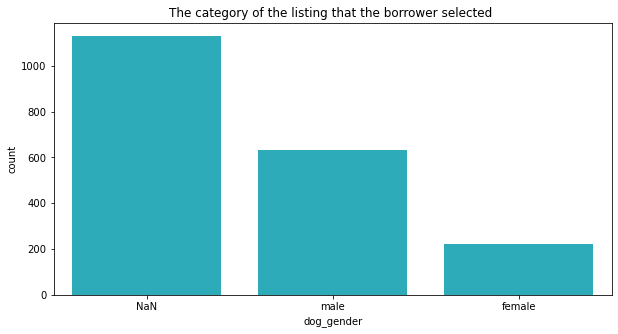

In [441]:
#Exploring feilds
twitter_enhanced_clean.columns

twitter_enhanced_clean.info()

# ListingCategory_Numeric
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[9]
plt.title("The category of the listing that the borrower selected ")
sb.countplot(data = twitter_enhanced_clean, x = 'dog_gender', color = base_color,
             order = twitter_enhanced_clean['dog_gender'].value_counts().index );

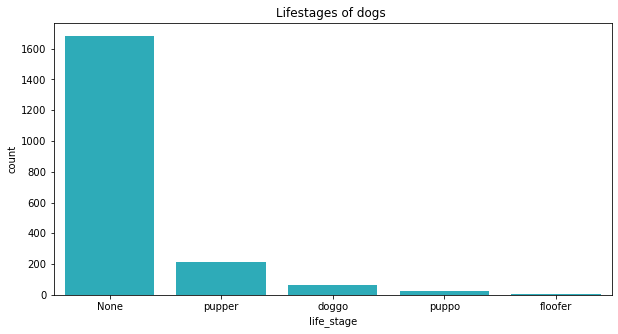

In [431]:
# life-stages of dogs in 
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[9]
plt.title("Lifestages of dogs ")
sb.countplot(data = twitter_enhanced_clean, x = 'life_stage', color = base_color,
             order = twitter_enhanced_clean['life_stage'].value_counts().index );

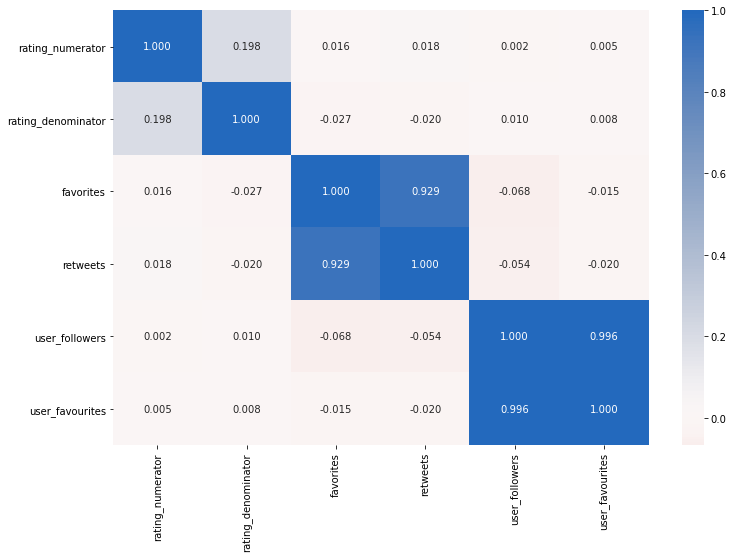

In [412]:
# correlation plot give an idea of the feild dependent on each other.
plt.figure(figsize = [12, 8])
sb.heatmap(twitter_enhanced_clean[twitter_enhanced_clean.columns].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

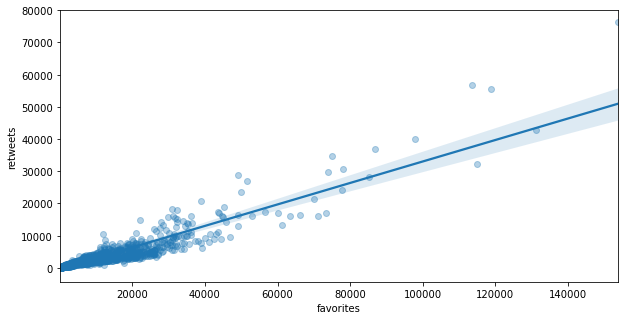

In [418]:
plt.figure(figsize=[10,5])
sb.regplot(data = twitter_enhanced_clean, x = 'favorites', y = 'retweets', fit_reg = True,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

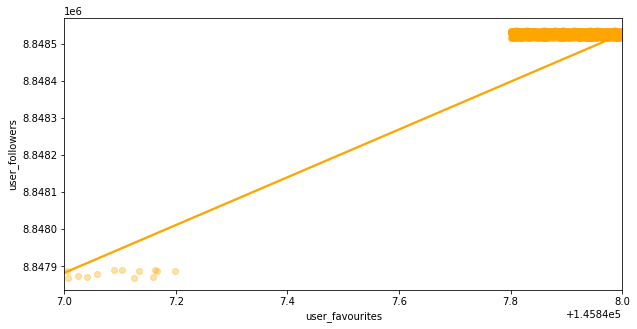

In [422]:
plt.figure(figsize=[10,5])
sb.regplot(data = twitter_enhanced_clean, x = 'user_favourites', y = 'user_followers',color='orange', fit_reg = True,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

In [430]:
twitter_enhanced_clean.name.value_counts()

None       640
Cooper      10
Oliver      10
Charlie     10
Penny        9
          ... 
Shooter      1
Ron          1
Tug          1
Bradlay      1
Tupawc       1
Name: name, Length: 915, dtype: int64

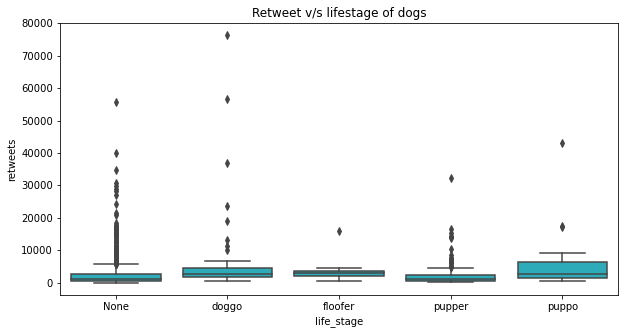

In [439]:
plt.figure(figsize=[10,5])
sb.boxplot(data = twitter_enhanced_clean, x='life_stage',y = 'retweets',color = sb.color_palette()[9]);
plt.title("Retweet v/s lifestage of dogs");